In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import pandas as pd

In [2]:
df = pd.read_pickle("tmp/df.pkl")

In [23]:
len(df)

1381

In [3]:
df.head()

,filename,label,type,model,mel,train,test
0,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,4,"[[-7.5002937, -4.639111, -6.0516047, -4.391639...",1,1
1,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,4,"[[-12.436094, -9.041126, -3.7102282, -1.664873...",0,1
2,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,4,"[[-9.425446, -5.0984335, -6.3233995, -8.37207,...",1,1
3,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,4,"[[-6.7651253, -3.5295246, -5.626698, -6.813489...",1,1
4,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,4,"[[-10.678015, -6.4591193, -6.473288, -9.170168...",0,1


In [4]:
df.shape

(1381, 7)

In [5]:
import sys
sys.path.append("src")

In [6]:
from utils.utils_general import get_matrixes

2024-07-09 13:27:14.629031: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-09 13:27:14.652235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 13:27:14.652254: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 13:27:14.652902: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-09 13:27:14.656610: I tensorflow/core/platform/cpu_feature_guar

In [7]:
train_data, validate_data, y_data, inputDim = get_matrixes(df, feat = "mel")

100%|██████████| 1381/1381 [00:00<00:00, 28021.95it/s]
2024-07-09 13:27:15.658094: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-09 13:27:15.678396: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-09 13:27:15.680957: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/

In [8]:
from train_and_eval.train_and_eval import train_and_eval_for_autoencoder

In [9]:
print(inputDim)

(64, 313)


In [10]:
autoencoder, calcuated_metrics = train_and_eval_for_autoencoder(train_data, validate_data, y_data, inputDim, feat = "mel", epochs = 100, save_mode = True, save_path = "tmp/autoencoder.pkl")

Epoch 1/100


2024-07-09 13:27:17.598732: I external/local_xla/xla/service/service.cc:168] XLA service 0x793b88a47c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-09 13:27:17.598747: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-07-09 13:27:17.602322: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-09 13:27:17.627794: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1720499237.679591  394913 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14/14 [==============================] - 2s 14ms/step - loss: 0.1824 - val_loss: 0.0269
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0185 - val_loss: 0.0072
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0053 - val_loss: 0.0041
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 8/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 9/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 10/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 11/100
14/14 [

In [11]:
from train_and_eval.submodule.metric import get_mse
from preprocess.submodule.vector_to_numpy_arr import vector_to_numpy_arr

import matplotlib.pyplot as plt

In [12]:
autoencoder.encoder.input_shape

(None, 64, 313)

In [13]:
reconstrctions = autoencoder.predict(train_data)

26/26 [==============================] - 0s 2ms/step


In [14]:
train_loss = get_mse(train_data, reconstrctions)

In [15]:
len(train_loss)

826

In [16]:
abnormal_data = vector_to_numpy_arr(df[(df["test"] == 1) & (df["label"] == -1)]["mel"].tolist())

100%|██████████| 348/348 [00:00<00:00, 28276.21it/s]


In [17]:
reconstrctions_abnormal = autoencoder.predict(abnormal_data)

 1/11 [=>............................] - ETA: 0s

11/11 [==============================] - 0s 2ms/step


In [18]:
validation_loss = get_mse(abnormal_data, reconstrctions_abnormal)

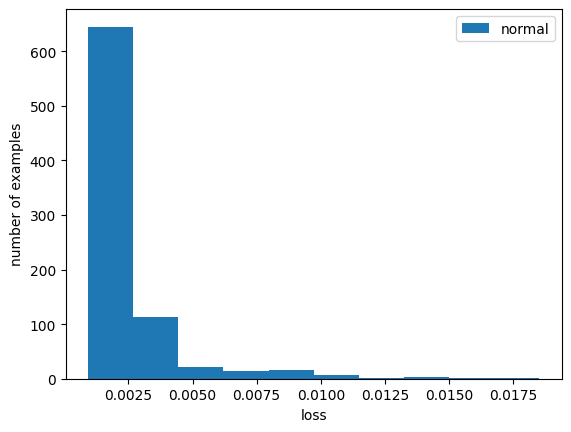

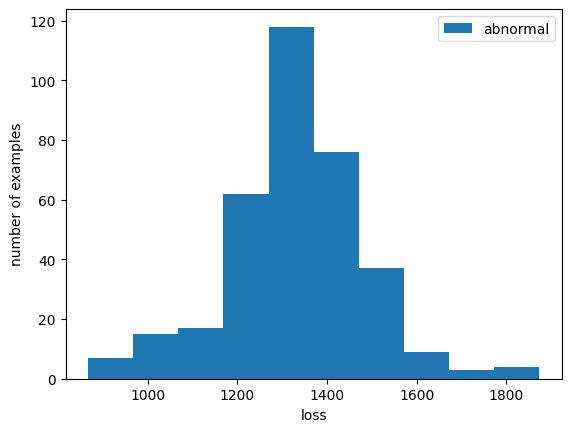

In [19]:
plt.hist(train_loss, label = "normal")
plt.xlabel("loss")
plt.ylabel("number of examples")
plt.legend()
plt.show()
plt.hist(validation_loss, label = "abnormal")
plt.xlabel("loss")
plt.ylabel("number of examples")
plt.legend()
plt.show()

In [20]:
calcuated_metrics

,Model,Machine,Feature_label,AUC,Precision,Recall,F1 for Abnormal
0,AE,Machine,mel,0.486641,0.742567,0.918683,0.084257


In [21]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 20032)             0         
                                                                 
 dense (Dense)               (None, 64)                1282112   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
Total params: 1289016 (4.92 MB)
Trainable params: 128901

In [22]:
autoencoder.encoder.save("tmp/encoder.h5")
autoencoder.decoder.save("tmp/decoder.h5")

/home/shinc/.cache/pypoetry/virtualenvs/paad-Xy15NbVr-py3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
